# Dataset Information

#### The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

### Attribute Information:

##### 1.sepal length in cm
##### 2.sepal width in cm
##### 3.petal length in cm
##### 4.petal width in cm
##### 5.class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# delete the id column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# display no. of samples on each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Preprocessing the dataset

In [7]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<Axes: >

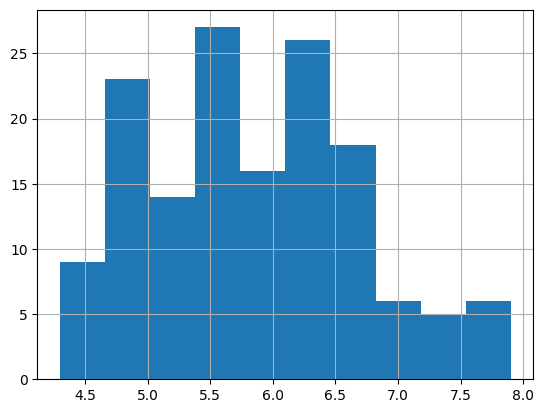

In [8]:
# histograms
df['SepalLengthCm'].hist()

<Axes: >

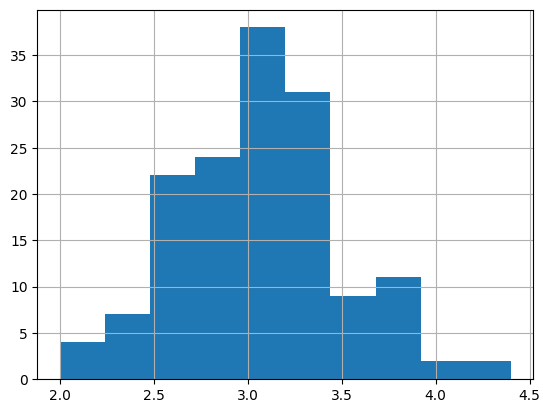

In [9]:
df['SepalWidthCm'].hist()

<Axes: >

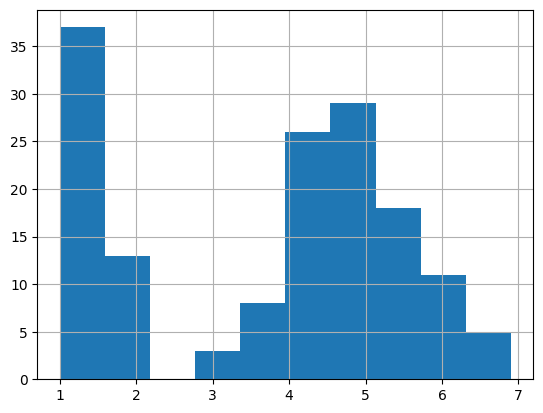

In [10]:
df['PetalLengthCm'].hist()

<Axes: >

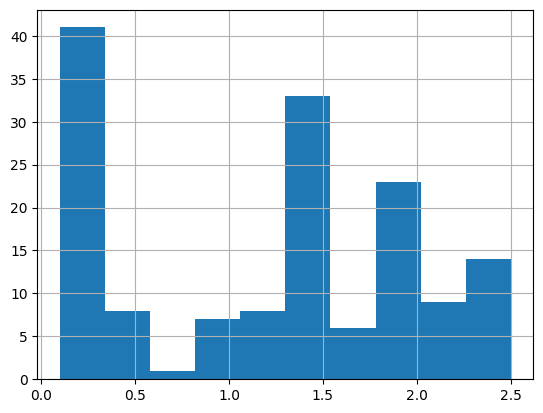

In [11]:
df['PetalWidthCm'].hist()

In [12]:
# scatterplot
colors = ['red', 'green', 'black']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

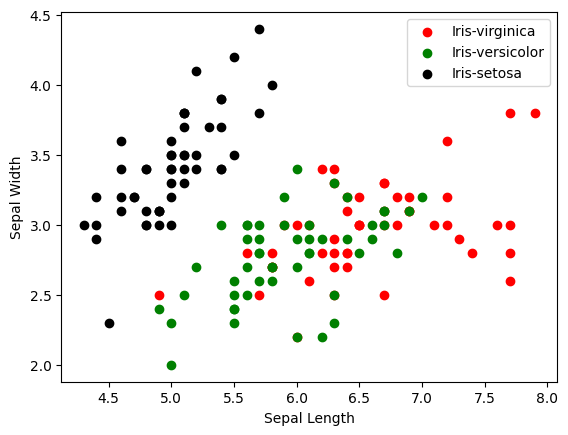

In [13]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

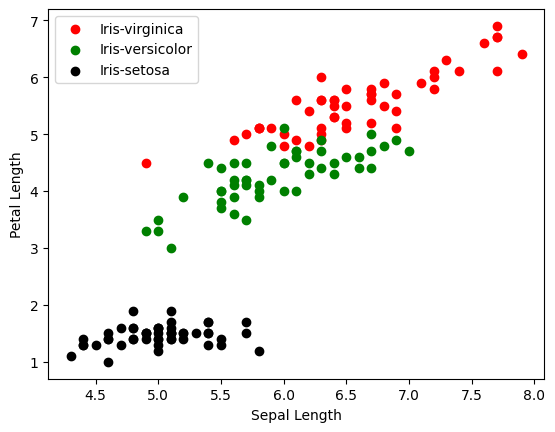

In [14]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

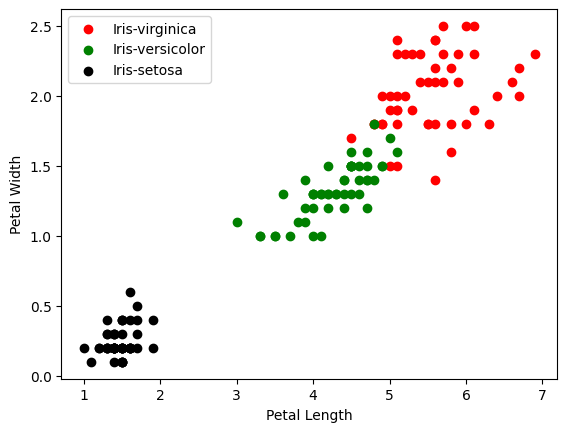

In [15]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

# Label Encoder

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [18]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [19]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [20]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [21]:
# predictions on the test set
y_pred_knn = model.predict(x_test)

In [22]:
# Calculate and print other metrics (optional)
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)

# Calculate precision (for each class)
precision = precision_score(y_test, y_pred_knn, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred_knn, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print classification report for more detailed metrics
report = classification_report(y_test, y_pred_knn)
print('Classification Report:\n', report)

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      0.92      0.92        13
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [23]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()

In [24]:
model1.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
# predictions on the test set
y_pred_dt = model1.predict(x_test)

In [26]:
# Calculate and print other metrics (optional)
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)

# Calculate precision (for each class)
precision = precision_score(y_test, y_pred_dt, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred_dt, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print classification report for more detailed metrics
report = classification_report(y_test, y_pred_dt)
print('Classification Report:\n', report)

Accuracy: 0.93
Precision: 0.94
Recall: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.86      0.92      0.89        13
           2       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45

